In [1]:
import sys
sys.path.insert(0, "../..")

import jax
import jax.numpy as jnp

import jax.scipy
import jax.scipy.special

from tqdm import tqdm
from functools import partial

import module.samplers
import module.hamiltonians
import module.wavefunctions

import flax.linen as nn

import optax
import numpy as np
from matplotlib import pyplot as plt

import run.utils
run.utils.path = "../../plots/"

import script.H2_distance

In [6]:
key = jax.random.PRNGKey(4)

In [14]:
E_target = -0.616515

In [31]:
dist = jnp.linspace(2.05, 2.15, num = 50)

Es = []
dEs = []
stdEs = []

In [32]:
i = 0
for d in dist:
    i += 1
    print("doing i =", i)
    key, _ = jax.random.split(key)
    E, dE, stdE = script.H2_distance.run(d, key, epoch = 90)
    Es.append(E)
    dEs.append(dE)
    stdEs.append(stdEs)

doing i = 1


100%|██████████| 90/90 [01:42<00:00,  1.14s/it]


doing i = 2


100%|██████████| 90/90 [01:42<00:00,  1.14s/it]


doing i = 3


100%|██████████| 90/90 [01:43<00:00,  1.15s/it]


doing i = 4


100%|██████████| 90/90 [01:47<00:00,  1.19s/it]


In [21]:
print("energy:", E, "+/-", dE, "Hartree")
print("error:", jnp.abs(E - E_target))

energy: -0.6038554 +/- 0.0006715185 Hartree
error: 0.012659609


In [33]:
dist

Array([2.05     , 2.0833333, 2.1166666, 2.15     ], dtype=float32)

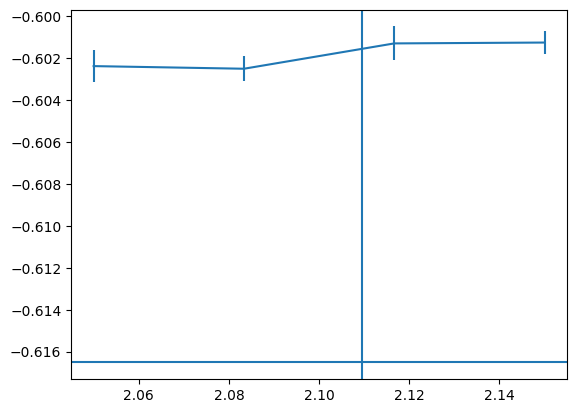

In [34]:
plt.errorbar(dist, Es, yerr= dEs)
plt.axhline(E_target)
plt.axvline(2.1095)